# 雑草の生育期間を区別せずに分類器を作る（10種類）

■グーグルドライブをマウント

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


■clusterディレクトリをカレントにコピー
※driveのデータを直接変更しないようにあらかじめコピーしておく

In [0]:
%cp -r ./drive/My\ Drive/DLdemo/cluster ./

★ここから実行！！
zipファイルをダウンロード！！

In [0]:
#グーグルドライブからファイルをダウンロードする方法
#ファイル限定

import requests

def download_file_from_google_drive(id, destination):

    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)

    token = get_confirm_token(response)

    if token:

        params = { 'id' : id, 'confirm' : token }

        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):

    for key, value in response.cookies.items():

        if key.startswith('download_warning'):

            return value

    return None

def save_response_content(response, destination):

    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:

        for chunk in response.iter_content(CHUNK_SIZE):

            if chunk: # filter out keep-alive new chunks

                f.write(chunk)

#取得されるトークン
file_id = '1XillhpofzGUFJwQ_CvXpsWDuWT0lp2-w'

#欲しいフォルダ名
destination = 'cluster.zip'

download_file_from_google_drive(file_id, destination)



In [2]:
!unzip cluster

Archive:  cluster.zip
   creating: cluster/
   creating: cluster/hakidamegiku/
   creating: cluster/hakidamegiku/grown/
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_10.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_14.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_16.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_17.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_19.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_2.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_3.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1546_7.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1547_10.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1547_13.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1547_3.JPG  
  inflating: cluster/hakidamegiku/grown/hakidamegiku_IMG_1573_1.JPG  
  inflating: cluster/hakidamegiku

■ディレクトリを作成

In [0]:
import os, shutil

# The directory where we will
# store our smaller dataset
base_dir = "./CLS"
if "CLS" not in os.listdir("./"):
  os.mkdir(base_dir)
else:
  print(base_dir, "は既に存在します")

train_index = "train"
train_dir = os.path.join(base_dir, train_index)
if train_index not in os.listdir(base_dir):
  os.mkdir(train_dir)
else:
  print(train_dir + "は既に存在します")

validation_index = "validation"
validation_dir = os.path.join(base_dir, validation_index)
if validation_index not in os.listdir(base_dir):
  os.mkdir(validation_dir)
else:
  print(validation_dir + "は既に存在します")

prediction_index = "prediction"
prediction_dir = os.path.join(base_dir, prediction_index)
if prediction_index not in os.listdir(base_dir):
  os.mkdir(prediction_dir)
else:
  print(prediction_dir + "は既に存在します")

#10分類のclassを入力
classes=["hakidamegiku","hosoaogeitou","ichibi",
         "inubie","kosendangusa","mameasagao",
         "mehishiba","ohishiba","oinutade","shiroza",]
dirs = os.listdir(base_dir)
for dir in dirs:
  for cls in classes:
    # Directory with our training pictures
    class_dir = os.path.join(base_dir, dir, cls)
    if cls not in os.listdir(base_dir + "/" + dir):
      os.mkdir(class_dir)
    else:
      print(class_dir, "は既に存在します")


■ディレクトリに画像をランダムに振り分け

In [4]:
from os.path import join
import random

clsdir = "./cluster"
base_dir = "./CLS"
dirs = os.listdir(base_dir)
weed_types = ["sprout","grown"]
weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# train, validationデータを作成
for weed_name in weed_names:
  for weed_type in weed_types: 
    print(weed_name, "/",weed_type)
    file_names = os.listdir(os.path.join(clsdir, weed_name, weed_type))
    files100 = random.sample(file_names, int(100))
    num1 = 0
    num2 = 0
    for file_name in file_names:
      if  file_name in files100:
        if num1 >= 90:
          continue
        # 移動元のファイル
        path1 = os.path.join(clsdir, weed_name, weed_type, file_name)
        # 移動先のファイル
        path2= os.path.join(base_dir, "train", weed_name, file_name)
        # ファイルを移動
        new_path = shutil.move(path1, path2)
        # ファイルの存在確認
        print(os.path.exists(path2))
        num1 = num1 + 1
      else:
        if num2 >= 90:
          continue 
        # 移動元のファイル
        path1 = os.path.join(clsdir, weed_name, weed_type, file_name)
        # 移動先のファイル
        path2= os.path.join(base_dir, "validation", weed_name, file_name)
        # ファイルを移動
        new_path = shutil.move(path1, path2)
        # ファイルの存在確認
        print(os.path.exists(path2))
        num2 = num2 + 1

# predictionデータを作成
for weed_name in weed_names:
  for weed_type in weed_types:
    print(weed_name, "/",weed_type)
    file_names = os.listdir(os.path.join(clsdir, weed_name, weed_type))
    for file_name in file_names:      
      # 移動元のファイル
      path1 = os.path.join(clsdir, weed_name, weed_type, file_name)
      # 移動先のファイル
      path2= os.path.join(base_dir, "prediction", weed_name, file_name)
      # ファイルを移動
      new_path = shutil.move(path1, path2)
      # ファイルの存在確認
      print(os.path.exists(path2))


ichibi / sprout
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
ichibi / grown
True
True
True
True
True
True
True
True
True
True
True
True
True
True

■解凍したファイルをそれぞれ訓練データと検証用のデータに分けます

In [5]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image

input_size = 224

train_dir = "./CLS/train"
validation_dir = "./CLS/validation"
prediction_dir = "./CLS/prediction"


train_datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            rescale=1./255
        )

val_datagen = Image.ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator = val_datagen.flow_from_directory(
            validation_dir,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )


prediction_generator = val_datagen.flow_from_directory(
            prediction_dir,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )


Using TensorFlow backend.


Found 1800 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


■学習開始

In [0]:

#ファインチューニング+VGG+水増し。ここから実行してOK（VGG16をダウンロード）
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications import VGG16
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import History, Callback
from keras.objectives import categorical_crossentropy
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import to_categorical
from scipy.stats import mode
import os, pickle


def create_cnn():
  input_size=224
  #input_sizeは224,224までOK。

  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_size,input_size, 3))
  last = vgg_conv.output

  vgg_conv.trainable = True

  set_trainable = False
  for layer in vgg_conv.layers:
    if layer.name == 'block5_conv1':
      set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False

  mod = Flatten()(last)
  mod = Dense(256, activation='relu')(mod)
  #mod = Dropout(0.5)(mod)
  preds = Dense(10, activation='softmax')(mod)

  model = models.Model(vgg_conv.input, preds)

  return model


チェックポイントを定義(val lossが一番低い値の時にweightを保存)

In [0]:
class Checkpoint(Callback):
    def __init__(self, model, filepath):
        self.model = model
        self.filepath = filepath
        self.best_val_acc = 0.0
        self.best_val_loss = 0.1

    def on_epoch_end(self, epoch, logs):
        # val_accuracyが最大の時ににweightを保存する
        # if self.best_val_acc < logs["val_accuracy"]:
        #     self.model.save_weights(self.filepath)
        #     self.best_val_acc = logs["val_accuracy"]
        #     print("Weights saved.", self.best_val_acc)

        # val_lossが最小の時ににweightを保存する
        if self.best_val_loss > logs["val_loss"]:
            self.model.save_weights(self.filepath)
            self.best_val_loss = logs["val_loss"]
            print("Weights saved.", self.best_val_loss)
        # print(epoch + 1)

        # epochの最後にweightを保存する
        # if epoch == 99:
        #   print("epoch equals ", epoch)
        #   self.model.save_weights(self.filepath)
        #   self.best_val_loss = logs["val_loss"]
        #   print("Weights saved.", self.best_val_loss)

モデルを実行してアンサンブル学習させていきます

In [0]:
def train():
    print("train starts")
    hist = History()
    train_model = create_cnn()
    train_model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
    cp = Checkpoint(train_model, f"weights.hdf5")
    train_model.fit_generator(train_generator,epochs=10,validation_data=validation_generator,callbacks=[hist, cp])      

    return hist.history




In [21]:
K.clear_session()
hist = train()

train starts
Epoch 1/5
180/180 [==============================] - 45s 251ms/step - loss: 1.9324 - accuracy: 0.2872 - val_loss: 1.6858 - val_accuracy: 0.5200
Epoch 2/5
180/180 [==============================] - 44s 243ms/step - loss: 1.2263 - accuracy: 0.5583 - val_loss: 0.9114 - val_accuracy: 0.7039
Epoch 3/5
180/180 [==============================] - 43s 240ms/step - loss: 0.9269 - accuracy: 0.6661 - val_loss: 0.6441 - val_accuracy: 0.7517
Epoch 4/5
180/180 [==============================] - 44s 242ms/step - loss: 0.7324 - accuracy: 0.7394 - val_loss: 0.6517 - val_accuracy: 0.7900
Epoch 5/5
180/180 [==============================] - 43s 241ms/step - loss: 0.6693 - accuracy: 0.7628 - val_loss: 0.4369 - val_accuracy: 0.8261


■正解率と損失率をグラフ化

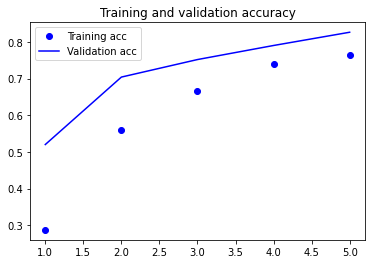

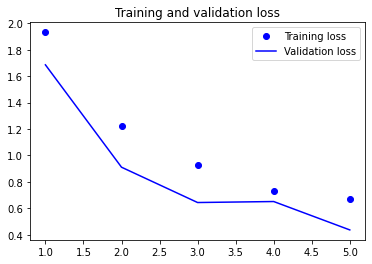

In [22]:
import matplotlib.pyplot as plt

history = hist

acc=history['accuracy']
val_acc=history['val_accuracy']
loss=history['loss']
val_loss=history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


■学習した分類器を単体で検証

weightをロードして単体で検証します

In [0]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES =True

clsdir = "/Users/nisi2/Desktop/cluster/"
# classes = ["hakidamegiku", "hamasuge (wild)","hosoaogeitou","inubie","inutade","kosendagusa","mehishiba","ohisiba","oinutade","shiroza"]
classes = ["mehishiba", "oinutade"]
num_classes = len(classes)
image_size = 28
num_testdata = 100

X_train = []
X_test = []
y_train = []
y_test = []
for index, classlabel in enumerate(classes):
    photos_dir = clsdir + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        # それぞれ400枚まで取得
        if i >= 400:
            break
        image = Image.open(file)
        image = image.convert("RGB")
  #      image = image.convert("L")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:
            for angle in range(-20, 20, 5):
                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                y_train.append(index)

                img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                y_train.append(index)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./weed.npy", xy)

In [0]:
def sin_predict():
  
    train_model = create_cnn()
    train_model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

    # 最良のモデルの読み込み
    train_model.load_weights(f"weights.hdf5")
    for layer in train_model.layers:
        layer.trainable = False

    # 単体の推論
    single_preds = np.argmax(train_model.predict_generator(prediction_generator), axis=-1)

    # 推論のスコア
    test_acc = accuracy_score(prediction_generator.classes[prediction_generator.index_array], single_preds)

    print("Test Accuracy : ", test_acc)


In [25]:
# 単体の推論
sin_predict()

OSError: ignored